<a href="https://colab.research.google.com/github/Narachii/tensorflow_basics/blob/LSTM_models/LSTM_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
### build the dataset
# This is a nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [12]:
# Try a linear model first - note: it is classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the network
r = model.fit(
  X, Y,
  epochs=100,
  validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 0s 6ms/step - loss: 0.7487 - accuracy: 0.4996 - val_loss: 0.6977 - val_accuracy: 0.4992
Epoch 2/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6954 - accuracy: 0.5060 - val_loss: 0.6938 - val_accuracy: 0.5088
Epoch 3/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.5112 - val_loss: 0.6949 - val_accuracy: 0.5108
Epoch 4/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5176 - val_loss: 0.6947 - val_accuracy: 0.5112
Epoch 5/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6941 - accuracy: 0.5092 - val_loss: 0.6938 - val_accuracy: 0.5188
Epoch 6/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6944 - accuracy: 0.5140 - val_loss: 0.6957 - val_accuracy: 0.5072
Epoch 7/100
79/79 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5192 - val_loss: 0.6953 - val_accuracy: 0.5072
Epoch 8/100
7

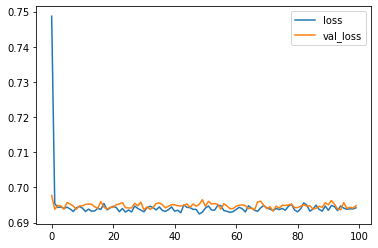

In [13]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

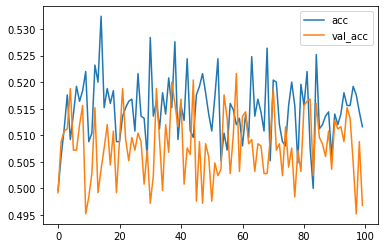

In [14]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Simple RNN
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))

x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

In [29]:
### Train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6869 - accuracy: 0.5552 - val_loss: 0.6633 - val_accuracy: 0.6440
Epoch 2/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6272 - accuracy: 0.7060 - val_loss: 0.5921 - val_accuracy: 0.7532
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.5483 - accuracy: 0.7968 - val_loss: 0.5034 - val_accuracy: 0.8236
Epoch 4/200
79/79 [==============================] - 1s 16ms/step - loss: 0.4815 - accuracy: 0.8324 - val_loss: 0.4390 - val_accuracy: 0.8592
Epoch 5/200
79/79 [==============================] - 1s 15ms/step - loss: 0.4186 - accuracy: 0.8544 - val_loss: 0.3750 - val_accuracy: 0.8836
Epoch 6/200
79/79 [==============================] - 1s 15ms/step - loss: 0.3547 - accuracy: 0.8896 - val_loss: 0.3147 - val_accuracy: 0.9096
Epoch 7/200
79/79 [==============================] - 1s 15ms/step - loss: 0.3035 - accuracy: 0.9116 - val_loss: 0.2575 - val_accuracy: 0.9252
Epoch 

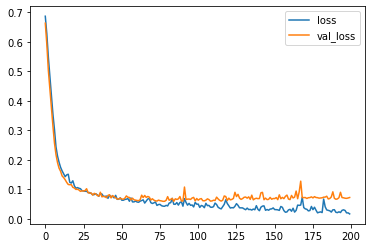

In [30]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

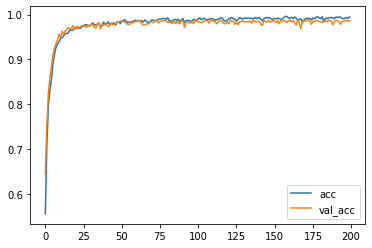

In [33]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Now change to the long distance problem

# Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [38]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))
x= SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 1s 17ms/step - loss: 0.7001 - accuracy: 0.5000 - val_loss: 0.6971 - val_accuracy: 0.5044
Epoch 2/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6944 - accuracy: 0.5112 - val_loss: 0.6920 - val_accuracy: 0.5200
Epoch 3/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6796 - accuracy: 0.5608 - val_loss: 0.6620 - val_accuracy: 0.6064
Epoch 4/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6519 - accuracy: 0.6208 - val_loss: 0.6362 - val_accuracy: 0.6444
Epoch 5/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6483 - accuracy: 0.6336 - val_loss: 0.6126 - val_accuracy: 0.6880
Epoch 6/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6283 - accuracy: 0.6648 - val_loss: 0.6172 - val_accuracy: 0.6732
Epoch 7/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6015 - accuracy: 0.6904 - val_loss: 0.5934 - val_accuracy: 0.6972
Epoch 

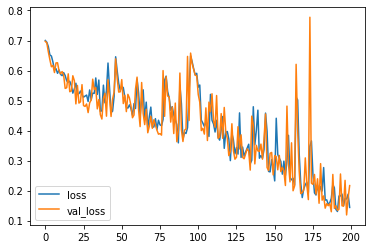

In [40]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

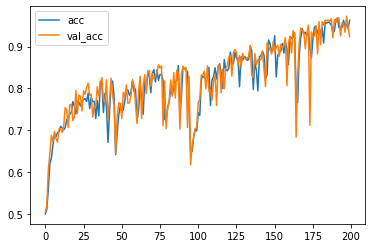

In [41]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [42]:
# Test LSTM
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))

x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5
)

Epoch 1/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6939 - accuracy: 0.5044 - val_loss: 0.6944 - val_accuracy: 0.5060
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6917 - accuracy: 0.5092 - val_loss: 0.6941 - val_accuracy: 0.5052
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6923 - accuracy: 0.5104 - val_loss: 0.6954 - val_accuracy: 0.4932
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.5272 - val_loss: 0.6947 - val_accuracy: 0.4960
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6906 - accuracy: 0.5252 - val_loss: 0.6950 - val_accuracy: 0.5032
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6883 - accuracy: 0.5364 - val_loss: 0.6907 - val_accuracy: 0.5328
Epoch 7/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6808 - accuracy: 0.5764 - val_loss: 0.6768 - val_accuracy: 0.5860
Epoch 8/200


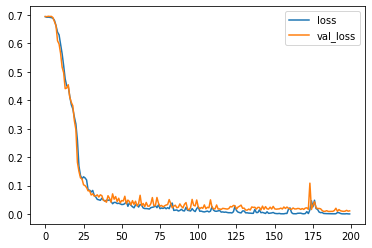

In [43]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

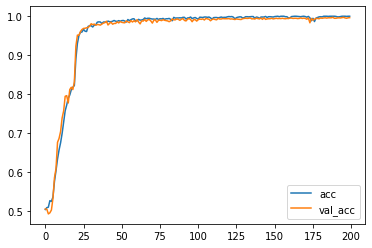

In [44]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [47]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6937 - accuracy: 0.5008 - val_loss: 0.6969 - val_accuracy: 0.4788
Epoch 2/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6940 - accuracy: 0.4992 - val_loss: 0.6951 - val_accuracy: 0.4792
Epoch 3/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6929 - accuracy: 0.5112 - val_loss: 0.6960 - val_accuracy: 0.4788
Epoch 4/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.5064 - val_loss: 0.6963 - val_accuracy: 0.4740
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5112 - val_loss: 0.6943 - val_accuracy: 0.4968
Epoch 6/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6936 - accuracy: 0.5048 - val_loss: 0.6961 - val_accuracy: 0.4812
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5172 - val_loss: 0.6942 - val_accuracy: 0.4824
Epoch 8/200


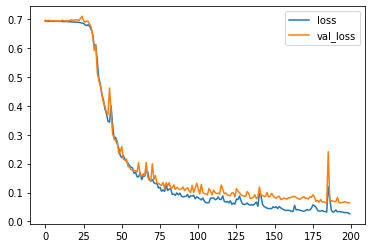

In [48]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

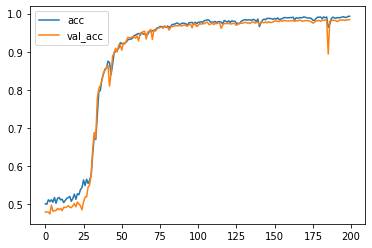

In [49]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [50]:
# Test GRU
inputs = np.expand_dims(X, -1)

i = Input(shape=(T,D))
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy']
)

r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 12ms/step - loss: 0.6946 - accuracy: 0.5088 - val_loss: 0.6954 - val_accuracy: 0.4948
Epoch 2/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5056 - val_loss: 0.6948 - val_accuracy: 0.4996
Epoch 3/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6938 - accuracy: 0.4952 - val_loss: 0.6949 - val_accuracy: 0.4796
Epoch 4/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6933 - accuracy: 0.5168 - val_loss: 0.6943 - val_accuracy: 0.4888
Epoch 5/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6944 - val_accuracy: 0.4780
Epoch 6/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6928 - accuracy: 0.5132 - val_loss: 0.6955 - val_accuracy: 0.4788
Epoch 7/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6950 - val_accuracy: 0.4800
Epoch 8/400


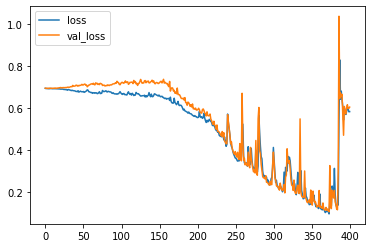

In [51]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

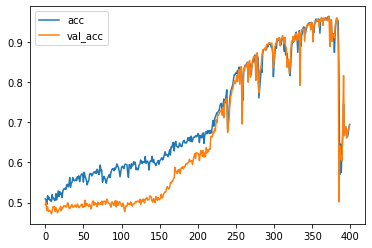

In [52]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [54]:
# Now test normal LSTM
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = LSTM(15)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 1s 13ms/step - loss: 0.6946 - accuracy: 0.5128 - val_loss: 0.6925 - val_accuracy: 0.5132
Epoch 2/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6940 - accuracy: 0.4880 - val_loss: 0.6934 - val_accuracy: 0.5008
Epoch 3/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6932 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5008
Epoch 4/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.5072 - val_loss: 0.6933 - val_accuracy: 0.5008
Epoch 5/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6933 - accuracy: 0.4984 - val_loss: 0.6933 - val_accuracy: 0.4816
Epoch 6/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6935 - accuracy: 0.5072 - val_loss: 0.6931 - val_accuracy: 0.5084
Epoch 7/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5008
Epoch 8/400


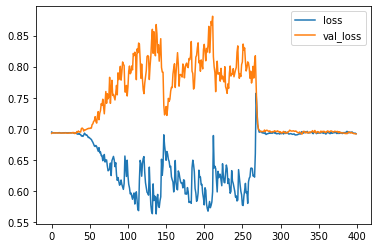

In [55]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

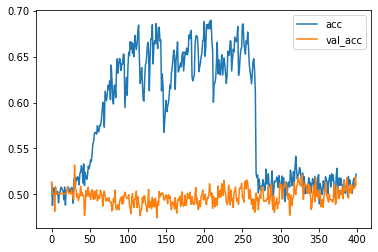

In [56]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [59]:
inputs = np.expand_dims(X, -1)

i = Input(shape=(T, D))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(lr=0.01),
    metrics=['accuracy'],
)

r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 1s 14ms/step - loss: 0.6947 - accuracy: 0.5024 - val_loss: 0.6942 - val_accuracy: 0.4984
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6950 - accuracy: 0.4824 - val_loss: 0.6934 - val_accuracy: 0.5024
Epoch 3/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6926 - accuracy: 0.5116 - val_loss: 0.6920 - val_accuracy: 0.5336
Epoch 4/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6915 - accuracy: 0.5236 - val_loss: 0.6917 - val_accuracy: 0.5272
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6917 - accuracy: 0.5096 - val_loss: 0.6907 - val_accuracy: 0.5280
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.6910 - accuracy: 0.5108 - val_loss: 0.6909 - val_accuracy: 0.5208
Epoch 7/100
79/79 [==============================] - 1s 9ms/step - loss: 0.6886 - accuracy: 0.5284 - val_loss: 0.6931 - val_accuracy: 0.5072
Epoch 8/100


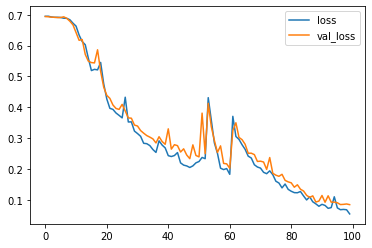

In [60]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

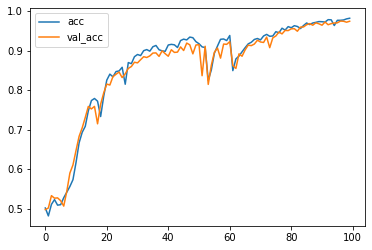

In [61]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()